In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from pandas_datareader import wb  
import datetime as dt
# from pandas_datareader import data
import pandas_datareader.data as dtr
# The yfinance is one of the famous modules in Python, which is used to collect online data, 
# and with it, we can collect the financial data of Yahoo
import yfinance as yfin
import seaborn as sn

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
start=dt.datetime(1984, 1, 2)
end=dt.datetime(2012, 12, 31)
tick='^GSPC'
# prices = data.DataReader(tick, 'yahoo', start, end)
yfin.pdr_override()
prices = dtr.get_data_yahoo(tick,start,end)

[*********************100%***********************]  1 of 1 completed


In [3]:
type(prices)

pandas.core.frame.DataFrame

In [14]:
prices

Open         High          Low        Close    Adj Close  \
Date                                                                          
1984-01-03   164.929993   164.929993   163.979996   164.039993   164.039993   
1984-01-04   164.089996   166.779999   164.039993   166.779999   166.779999   
1984-01-05   166.779999   169.100006   166.779999   168.809998   168.809998   
1984-01-06   168.809998   169.309998   168.490005   169.279999   169.279999   
1984-01-09   169.179993   169.460007   168.479996   168.899994   168.899994   
...                 ...          ...          ...          ...          ...   
2012-12-21  1443.670044  1443.670044  1422.579956  1430.150024  1430.150024   
2012-12-24  1430.150024  1430.150024  1424.660034  1426.660034  1426.660034   
2012-12-26  1426.660034  1429.420044  1416.430054  1419.829956  1419.829956   
2012-12-27  1419.829956  1422.800049  1401.800049  1418.099976  1418.099976   
2012-12-28  1418.099976  1418.099976  1401.579956  1402.430054  1402.430054   

                Volume  
Date                    
1984-01-03    71340000  
1984-01-04   112980000  
1984-01-05   159990000  
1984-01-06   137590000  
1984-01-09   107100000  
...                ...  
2012-12-21  5229160000  
2012-12-24  1248960000  
2012-12-26  2285030000  
2012-12-27  2830180000  
2012-12-28  2426680000  

[7312 rows x 6 columns]

In [15]:
prices.to_csv(r'SNP_data.csv')
prices.to_csv(r'SNP_data_noindex.csv',index=False)

In [16]:
price_cl = prices['Adj Close']
type(price_cl)

pandas.core.series.Series

In [4]:
# Compute returns
price_cl = prices['Adj Close']
df_temp_c=np.log(price_cl)  # first get logs of indices
log_ret_c=df_temp_c.diff().dropna()    # differences of logs is the log return
                                       # log returns drop missing values
return_cl=100*log_ret_c                                       

#return_cl = 100 *price_cl.pct_change().dropna()  # percentage change
                                                    # drop  missing values

Text(0.5, 0, 'Date')

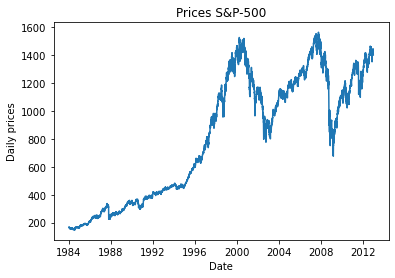

In [5]:
# plot closing prices          
                                                    
plt.plot(price_cl)      
plt.title('Prices S&P-500')
plt.ylabel('Daily prices')
plt.xlabel('Date')

Text(0.5, 0, 'Date')

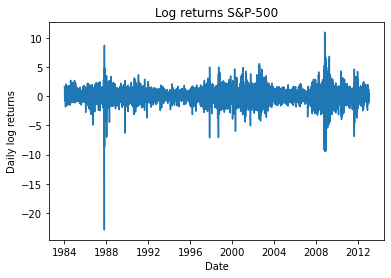

In [6]:
# plot the returns time series                                 
                                                
plt.plot(return_cl)
plt.title('Log returns S&P-500')
plt.ylabel('Daily log returns')
plt.xlabel('Date')

Θα  υπολογίσουμε ΄τώρα την συνάρτηση αυτοσυσχέτισης των λογαριθμικών αποδόσεων και την συνάρτηση αυτοσυσχέτισης των
τετραγώνων των λογαριθμικών αποδόσεων. Θα δούμε ότι ενώ η συνάρτηση αυτοσυσχέτισης για τις λογαριθμικές αποδόσεις πέφτει πολύ γρήγορα, δεν ισχύει το ίδιο για τα τετράγωνα τους

We will compute the autocorellation function of the logreturn as well as their squares

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


Text(0, 0.5, 'ACF(log($P_{t+1}/P_{t}$))')

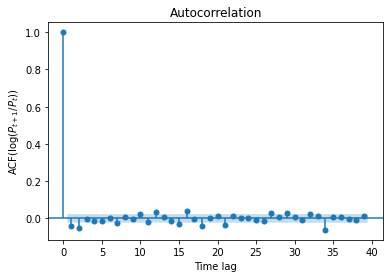

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(return_cl)
plt.xlabel('Time lag')
plt.ylabel('ACF(log($P_{t+1}/P_{t}$))')

Text(0, 0.5, 'ACF((|log($P_{t+1}/P_{t}$))|')

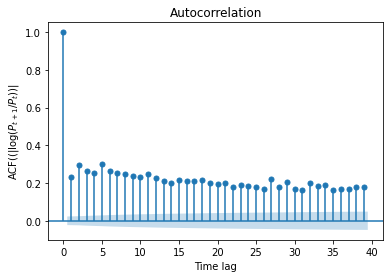

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(np.abs(return_cl))
plt.xlabel('Time lag')
plt.ylabel('ACF((|log($P_{t+1}/P_{t}$))|')

Text(0, 0.5, 'ACF((log($P_{t+1}/P_{t}$))$^2$')

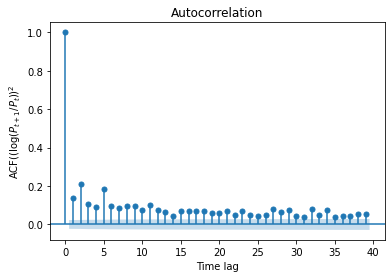

In [22]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(return_cl**2)
plt.xlabel('Time lag')
plt.ylabel('ACF((log($P_{t+1}/P_{t}$))$^2$')

# Εκτίμηση παραμέτρων για το μοντέλο Garch(1,1)

Θα κάνουμε την εκτίμηση παραμέτρων για το μοντέλο Garch(1,1) χρησιμοποιώντας την μεγιστοποίηση της λογαριθμικής πιθανοφάνειας
(ισοδύναμα ελαχιστοποίηση - λογαριθμική πιθανοφάνεια)

Parameter estimation for the Garch(1,1) model by maximum likelihood

In [9]:
############################################3
#
#
#  Now prepare for the estimation of the Garch11 model
#
#########################################

from numpy import size, log, pi, sum, array, zeros, diag, mat, asarray, sqrt, \
    copy
from numpy.linalg import inv
from scipy.optimize import fmin_slsqp

In [10]:
#######################################
#
#
#   this is the function that calculates log-likelihood
#
###########################################


def gjr_garch_likelihood(parameters, data, sigma2, out=None):
    ''' Returns negative log-likelihood for GJR-GARCH(1,1,1) model.'''
    mu = parameters[0]
    omega = parameters[1]
    alpha = parameters[2]
#    gamma = parameters[3]
    betag = parameters[3]
    
    T = size(data,0)
    eps = data - mu
    # Data and sigma2 are T by 1 vectors
    for t in range(1,T):
        sigma2[t] = omega + alpha * eps[t-1]**2 + betag * sigma2[t-1]
                   #  + gamma * eps[t-1]**2 * (eps[t-1]<0) + beta * sigma2[t-1])
    
    logliks = 0.5*(log(2*pi) + log(sigma2) + eps**2/sigma2)
    loglik = sum(logliks)
    
    if out is None:
        return loglik
    else:
        return loglik, logliks, copy(sigma2)
    

In [11]:
###########################################
#
#  this is the function that generates the  constraints
#  of the model
#
############################################ 
        
    
def gjr_constraint(parameters, data, sigma2, out=None):
    ''' Constraint that alpha+gamma/2+beta<=1'''
    
    alpha = parameters[2]
  #  gamma = parameters[3]
    betag= parameters[3]

    return array([1-alpha-betag])

In [12]:
######################################3
 #
#  initiate the optimization routine from scipy
#
###########################################   
 
 
# Starting values
startingVals = array([return_cl.mean(),
                      return_cl.var() * .01,     ### perhaps not 0.01
                      .03, .1])

# Estimate parameters  but first set the bounds for the solution
finfo = np.finfo(np.float64)
bounds = [(-10*abs(return_cl.mean()), 10*abs(return_cl.mean())),
          (finfo.eps, 2*return_cl.var() ),
          (0.0,1.0), (0.0,1.0)]
       
T = return_cl.shape[0]   # gives total number of data
sigma2 = np.ones(T) * return_cl.var()    # returns a constant sigma2
                            # equal with the value of the long run volatility
# Pass a NumPy array, not a pandas Series
args = (np.asarray(return_cl), sigma2)


estimates = fmin_slsqp(gjr_garch_likelihood, startingVals,
                       f_ieqcons=gjr_constraint, bounds = bounds,
                       args = args)
# fmin_slsqp is a routine in scipy optimize that
#  Minimizes a function using Sequential Least SQuares Programming


Optimization terminated successfully    (Exit mode 0)
            Current function value: 116365.6899536427
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 1


In [13]:
# estimates returns an array the contains the numerical solution 
# of the optimization problem

estimates




array([0.029351  , 0.01374711, 0.03      , 0.1       ])

In [14]:
estimates[0]

0.02935099854986562

In [15]:
sig2_asymp=estimates[1]/(1-estimates[2]-estimates[3])
print(sig2_asymp)

0.015801281558207838


Text(0, 0.5, '$\\sigma^2(t)$')

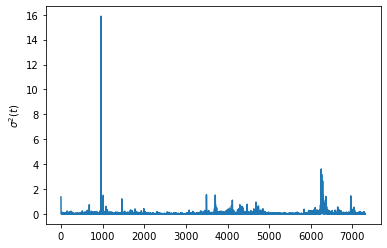

In [16]:



loglik, logliks, sigma2final = gjr_garch_likelihood(estimates, return_cl,
                                                    sigma2, out=True)


#sigma2final is the volatility process as generated by the model for
# the estimated parameters

plt.plot(sigma2final)
plt.ylabel('$\sigma^2(t)$')

Text(0, 0.5, 'log(R(t))')

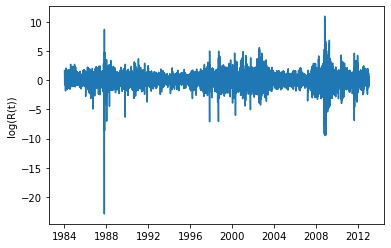

In [17]:
plt.plot(return_cl)
plt.ylabel('log(R(t))')